<a href="https://colab.research.google.com/github/nehapokharel/brain-tumor-detection/blob/main/tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import os
import skimage
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from skimage import transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [2]:
#making content of google drive accessible
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls "gdrive/MyDrive/MRI_BRAIN_TUMOR/dataset"

no  yes


In [4]:
classes = ["yes", "no"]
n_classes = len(classes)

In [5]:
def load_data():
    """This function loads the data and prepares it to be 
    used by th neneural network. It consists of:
        1. loading images
        2. `normalization`. Original pixel values are in range [0, 255], 
           but neural networks usually work better if the input values are in
           range [0, 1].
        3. resize the image """  
    x = []
    y = []
    path = "gdrive/MyDrive/MRI_BRAIN_TUMOR/dataset"
    for i, c in enumerate(classes):
        for file in os.listdir(os.path.join(path, c)):
            if file.endswith(".jpeg") or file.endswith(".jpg"):
                img = plt.imread(os.path.join(path, c, file))
                img = img / 255.   
                img = transform.resize(img, (32, 32), mode='constant')
                img = img.astype('float32') 
                if len(img.shape) == 3 and img.shape[-1] == 3:
                    x.append(img)
                    y.append(i)  
    x = np.stack(x, axis=0)
    y = np.array(y)
    print(f"x shape: {x.shape}, y shape: {y.shape}")
    return x, y

In [6]:
x, y = load_data() #function call

x shape: (142, 32, 32, 3), y shape: (142,)


In [7]:
#Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# **Converting lists to numpy array**

In [8]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
X_train.shape

(113, 32, 32, 3)

In [11]:
# Create the model

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64,kernel_size=9, padding='same', activation='relu', input_shape=(32, 32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.45))

model.add(keras.layers.Conv2D(filters=64,kernel_size=9,padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=9, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Dense(1, activation='sigmoid'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        331840    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [12]:
base_learning_rate = 1e-4
initial_epochs = 100

opt = keras.optimizers.Adam(learning_rate=base_learning_rate)

In [13]:
# Compile model
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy()])

In [14]:
my_callbacks = [
    keras.callbacks.CSVLogger('gdrive/MyDrive/team_sathi/flog10.csv', separator=",", append=False),
    keras.callbacks.EarlyStopping(monitor='loss', patience=5)
]

In [15]:
history = model.fit(X_train, y_train, epochs = initial_epochs, callbacks=my_callbacks, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 3s 658ms/step - loss: 0.6877 - binary_accuracy: 0.4956 - val_loss: 0.6879 - val_binary_accuracy: 0.5517
Epoch 2/100
4/4 [==============================] - 2s 581ms/step - loss: 0.6852 - binary_accuracy: 0.5664 - val_loss: 0.6879 - val_binary_accuracy: 0.6552
Epoch 3/100
4/4 [==============================] - 2s 580ms/step - loss: 0.6797 - binary_accuracy: 0.6637 - val_loss: 0.6838 - val_binary_accuracy: 0.6207
Epoch 4/100
4/4 [==============================] - 2s 574ms/step - loss: 0.6848 - binary_accuracy: 0.5752 - val_loss: 0.6778 - val_binary_accuracy: 0.6207
Epoch 5/100
4/4 [==============================] - 2s 579ms/step - loss: 0.6736 - binary_accuracy: 0.6106 - val_loss: 0.6794 - val_binary_accuracy: 0.6552
Epoch 6/100
4/4 [==============================] - 2s 569ms/step - loss: 0.6664 - binary_accuracy: 0.6372 - val_loss: 0.6762 - val_binary_accuracy: 0.6552
Epoch 7/100
4/4 [==============================] - 2s 570ms/step - los

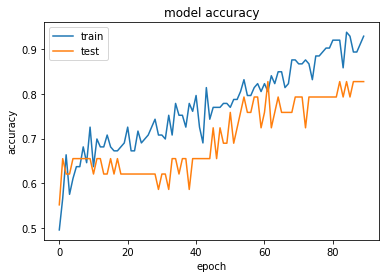

In [16]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

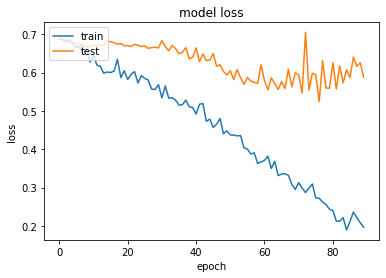

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()